DSA_feature 데이터 셋으로

비선형 활성화 함수를 쓰는 비선형 오토인코더 모델을 구현.

비선형 오토인코더 모델 중에서 인코더와 디코더의 구조가 대칭인 인코더와

인코더와 디코더의 구조가 비대칭인 비대칭 인코더

2가지를 구현해본다.

1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\성욱\OneDrive\바탕 화면\3-2\deep\data\DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [5]:
df.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Columns: 272 entries, T_xacc_mean to people
dtypes: float64(270), object(2)
memory usage: 18.9+ MB


In [9]:
# 결측치 확인

df.isnull().values.any()

False

2. 필요한 데이터만 추출하기

Normal - lyingBack,lyingRigh

Abnormal - sitting 으로

In [12]:
print(df['activity'].unique())

['sitting' 'standing' 'lyingBack' 'lyingRigh' 'ascendingStairs'
 'decendingStairs' 'standingInElevatorStill' 'movingInElevator'
 'walkingLot' 'walkingTreadmillFlat' 'walkingTreadmillIncline'
 'runningTreadmill' 'stepper' 'crossTrainer' 'cyclingHorizontal'
 'cyclingVertical' 'rowing' 'jumping' 'basketBall']


In [14]:
# activity 열에서 'lyingBack', 'lyingRigh', 'sitting' 만 추출하기
df = df[df['activity'].isin(['lyingBack', 'lyingRigh', 'sitting'])]
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,lyingRigh,p8
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,lyingRigh,p8
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,lyingRigh,p8
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,lyingRigh,p8


In [16]:
# 제대로 원하는 값들이 추출되었는지 확인하는 과정
df['activity'].unique(), df.shape, df['activity'].value_counts()


(array(['sitting', 'lyingBack', 'lyingRigh'], dtype=object),
 (1440, 272),
 activity
 sitting      480
 lyingBack    480
 lyingRigh    480
 Name: count, dtype: int64)

3. activity 열 전처리 하기

activity 값이 수치형 데이터가 아니므로 sitting 등 문자열이 아닌 정상 데이터를 0으로 비정상 데이터를 1로 바꿔준다.

In [20]:
# 'activity' 열 전처리: lyingBack, lyingRigh -> 정상 (0), sitting -> 비정상 (1)
df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})
df

C:\Users\성욱\AppData\Local\Temp\ipykernel_14252\1868954632.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})
C:\Users\성욱\AppData\Local\Temp\ipykernel_14252\1868954632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity'] = df['activity'].replace({'lyingBack': 0, 'lyingRigh': 0, 'sitting': 1})


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,0,p8
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,0,p8
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,0,p8
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,0,p8


C:\Users\성욱\AppData\Local\Temp\ipykernel_14252\3755690299.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['activity'], sort = True)


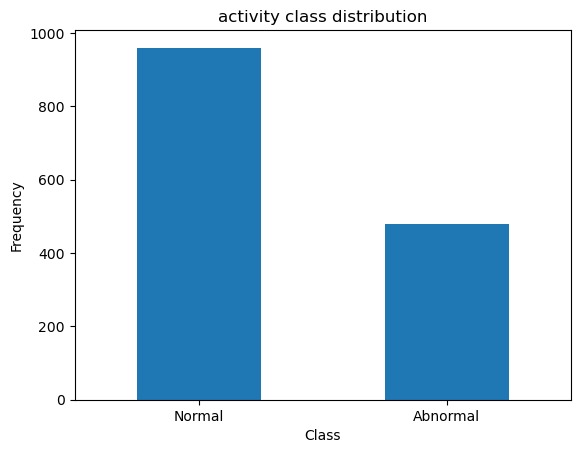

In [22]:
# 비율 확인
LABELS = ["Normal","Abnormal"]
count_classes = pd.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("activity class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

4. 데이터 세트 train,test,valid 분리 및 데이터 정규화하기

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test = train_test_split(df, test_size=0.2,shuffle=True, random_state=42)
x_train, x_valid = train_test_split(x_train, test_size=0.2,shuffle=True, random_state=42)

# 정상 데이터(0)만 사용하여 학습에 활용 (lyingBack, lyingRight)
# values를 통해 넘파이 배열로 바꿔주기
x_train = x_train[x_train.activity == 0]
x_train = x_train.drop(['activity', 'people'], axis=1).values

x_valid = x_valid[x_valid.activity == 0]
x_valid = x_valid.drop(['activity', 'people'], axis=1).values

# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임
y_test = x_test['activity']  # 테스트 데이터에서 활동 라벨만 남기기
x_test = x_test.drop(['activity', 'people'], axis=1).values

x_train.shape, x_valid.shape, x_test.shape, y_test.shape


((607, 270), (156, 270), (288, 270), (288,))

In [27]:
# StandardScaler로 데이터 정규화
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

x_train.shape, x_valid.shape, x_test.shape

((607, 270), (156, 270), (288, 270))

5. 비선형 대칭 오토인코더(Non-Linear
 Symmetric AutoEncoder) 모델 만들기

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

기존 오토인코더와 달리 선형 오토인코더는 활성화 함수로 'relu' 등이 필요가 없다.

비선형 활성화 함수인 ReLU,sigmoid 등을 적용해서 인코더와 디코더의 구조가 대칭인 오토인코더를 구성한다.



In [35]:
# 비선형 오토인코더 모델
input_dim = x_train.shape[1]
#입력 차원의 1/10인 27을 넣을 수도 있다.
encoding_dim = 27  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)


def non_linear_symmetric_autoencoder(input_dim, encoding_dim):

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    encoded = Dense(int(encoding_dim/2), activation='relu')(encoded)
    decoded = Dense(int(encoding_dim/2), activation='relu')(encoded)
    decoded = Dense(encoding_dim, activation='relu')(decoded)

    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder 모델
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    return autoencoder

# 모델 빌드
autoencoder = non_linear_symmetric_autoencoder(input_dim, encoding_dim)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 27)                  │           7,317 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 13)                  │             364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 27)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 270)                 │           7,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,801 (61.72 KB)

 Trainable params: 15,801 (61.72 KB)

 Non-trainable params: 0 (0.00 B)

학습하기

In [37]:
history = autoencoder.fit(x_train,x_train,epochs=30,batch_size=32,validation_data=(x_valid,x_valid),shuffle=True)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.0916 - val_loss: 0.9173
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1891 - val_loss: 0.8077
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4622 - val_loss: 0.6738
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7306 - val_loss: 0.6188
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7797 - val_loss: 0.6055
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7703 - val_loss: 0.6001
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7753 - val_loss: 0.5942
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1758 - val_loss: 0.5870
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7613 - val_loss: 0.5789
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8056 - val_loss: 0.5699
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9707 - val_loss: 0.5615
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7281 - val_l

손실값 그래프로 출력

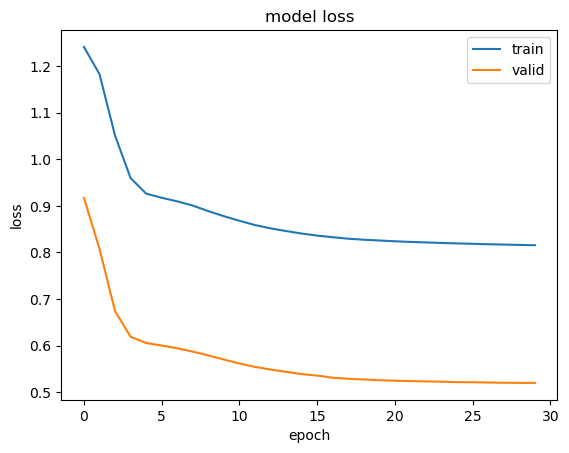

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right');

6. 학습한 결과 바탕으로 최종 분석

In [41]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨
# 오토인코더를 사용한 이상 탐지에서, 재구성 오류(Reconstruction Error)는 입력 데이터가
# 얼마나 잘 복원되었는지 측정하는 값
# 이를 통해 정상 데이터와 비정상 데이터를 구분할 수 있다.
# 재구성 오류 값은 test-predic 의 제곱의 평균인 MSE 로 나타내어 표기한다.

predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df = error_df.reset_index(drop = True)

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,reconstruction_error,true_class
count,288.000000,288.000000
mean,3.724262,0.315972
std,42.422127,0.465711
min,0.137697,0.000000
25%,0.307351,0.000000
50%,0.446453,0.000000
75%,0.857070,1.000000
max,712.122590,1.000000


In [18]:
error_df.head()

,reconstruction_error,true_class
0,0.976317,1
1,0.475241,0
2,0.609030,0
3,1.328751,1
4,0.451086,0


정상 데이터의  Reconstruction Error 를 분석해보면

최솟값은 0.13 최댓값은 8.89 이고

데이터의 분포는 3분위수값을 보면 0.45 값 아래로 데이터의 75%가 분포 해 있음을 알 수 있다.

In [44]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()

,reconstruction_error,true_class
count,197.000000,197.0
mean,0.496643,0.0
std,0.828624,0.0
min,0.137697,0.0
25%,0.278756,0.0
50%,0.337376,0.0
75%,0.455301,0.0
max,8.836211,0.0


비정상 데이터의 Reconstruction Error를 분석해보면

최솟값은 0.48, 최댓값은 712로 분포해 있고

3분위수 값을 통하여 데이터의 75%가 1.25 값 아래 있음을 알 수 있다.

따라서 최적의 threshold를 정할 때 정상 데이터 분석과 비교해서 0.4~0.5 사이가 적당한 것 같다.

In [47]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()

,reconstruction_error,true_class
count,91.000000,91.0
mean,10.711527,1.0
std,75.267387,0.0
min,0.480758,1.0
25%,0.820627,1.0
50%,0.969237,1.0
75%,1.333851,1.0
max,712.122590,1.0


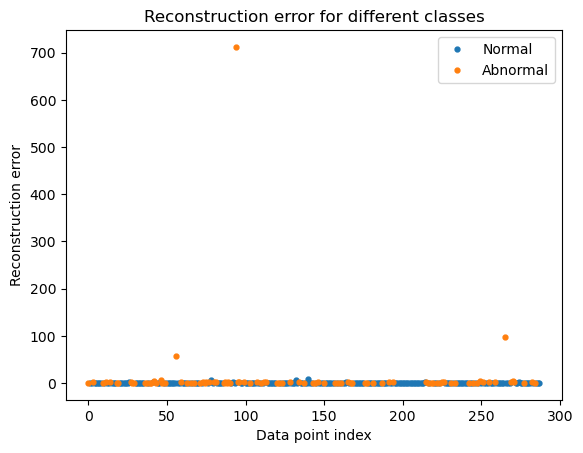

In [49]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [127]:
# threshold 값을 조정하여 최선의 정확도를 얻음,

threshold =0.6

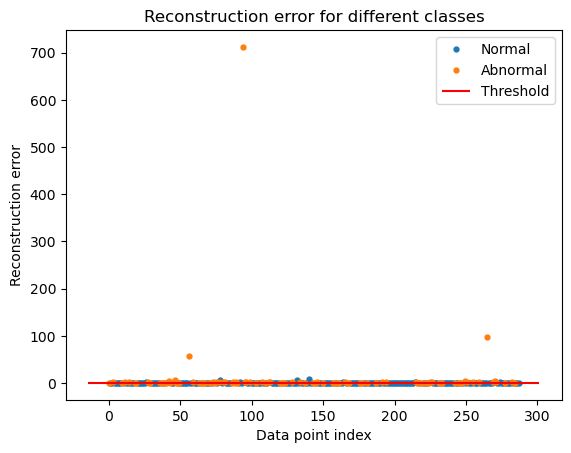

In [71]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

confusion_matrix, classification_report 를 통해 여러 수치 확인하기.

Precision (정밀도): 정밀도는 모델이 Positive 클래스로 예측한 샘플 중에서 실제로 Positive인 샘플의 비율

Recall (재현율): 재현율은 실제 Positive 샘플 중에서 모델이 Positive으로 올바르게 예측한 비율

F1-Score: F1-Score는 정밀도와 재현율의 조화 평균. 즉, 정밀도와 재현율의 균형을 고려한 지표로, 두 값이 비슷할 때 높은 값을 가진다.

Accuracy (정확도): 정확도는 전체 샘플 중에서 모델이 올바르게 예측한 샘플의 비율

Macro Avg (매크로 평균): 클래스 간의 비율에 관계없이 단순 평균을 낸 값

Weighted Avg (가중 평균): 클래스 비율에 따라 가중치를 부여한 평균

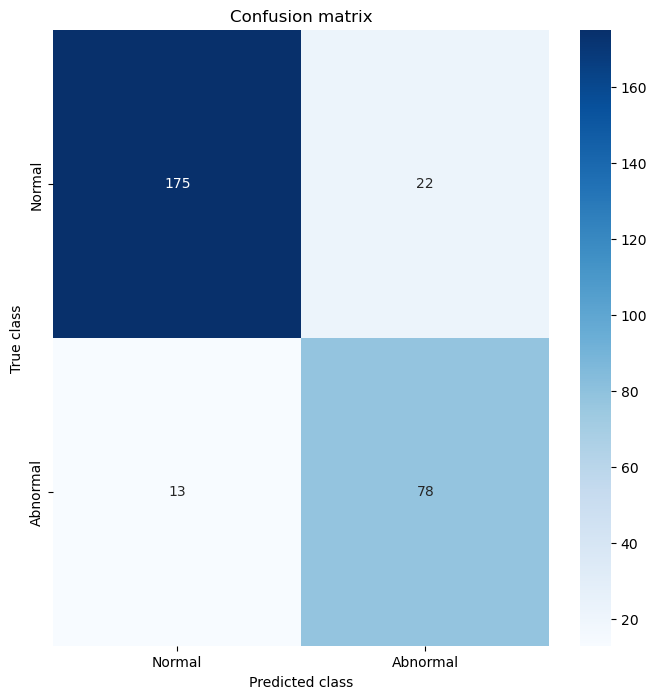

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       197
           1       0.78      0.86      0.82        91

    accuracy                           0.88       288
   macro avg       0.86      0.87      0.86       288
weighted avg       0.88      0.88      0.88       288



In [129]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

7. 비선형 비대칭 오토인코더 모델

비선형 형태의 인코더 디코더의 구조가 비대칭인
오토인코더 모델로 위에서 수행한 비선형 대칭 오토인코더와 비교를 해본다.

차원 축소는 빠르게 하고(인코더), 복원 과정은 더 많은 층 또는 차원을 통해 더 많은 단계를 거치게 한다(디코더)

270 -> 54 -> 13 으로 줄이고
13->27->54-> 270 으로 복원하기

In [93]:
# 비선형 오토인코더 모델
input_dim = x_train.shape[1]
#입력 차원의 1/10인 27을 넣을 수도 있다.
encoding_dim = 27  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)


def non_linear_asymmetric_autoencoder(input_dim, encoding_dim):

    input_layer = Input(shape=(input_dim,))
    # 첫 번째 인코더 층
    encoded = Dense(int(encoding_dim*2), activation='relu')(input_layer)
    # 두 번째 인코더 층(최종 압축)
    encoded = Dense(int(encoding_dim/2), activation='relu')(encoded)

    # 첫 번째 디코더 층
    decoded = Dense(int(encoding_dim/2), activation='relu')(encoded)
    # 두 번째 디코더 층
    decoded = Dense(int(encoding_dim), activation='relu')(decoded)
    
    decoded = Dense(int(encoding_dim*2), activation='relu')(decoded)
    decoded = Dense(int(encoding_dim*4), activation='relu')(decoded)

    # 세번째 디코더 층(최종 복원 층)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder 모델
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    return autoencoder

# 모델 빌드
asy_autoencoder = non_linear_asymmetric_autoencoder(input_dim, encoding_dim)

asy_autoencoder.compile(optimizer='adam', loss='mse')
asy_autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 54)                  │          14,634 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 13)                  │             715 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 27)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 54)                  │           1,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 108)                 │           5,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 270)                 │          29,430 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,791 (206.21 KB)

 Trainable params: 52,791 (206.21 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
history2 = asy_autoencoder.fit(x_train,x_train,epochs=30,batch_size=32,validation_data=(x_valid,x_valid),shuffle=True)


Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.1184 - val_loss: 0.8519
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1971 - val_loss: 0.6713
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8977 - val_loss: 0.6495
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8752 - val_loss: 0.6324
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7989 - val_loss: 0.6176
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9544 - val_loss: 0.6092
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9499 - val_loss: 0.5989
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8545 - val_loss: 0.5913
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8978 - val_loss: 0.5823
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0518 - val_loss: 0.5731
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8159 - val_loss: 0.5621
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1505 - val_l

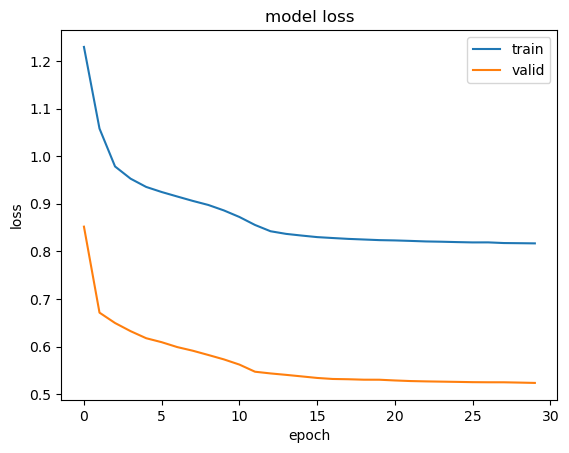

In [97]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right');

In [99]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨
# 오토인코더를 사용한 이상 탐지에서, 재구성 오류(Reconstruction Error)는 입력 데이터가
# 얼마나 잘 복원되었는지 측정하는 값
# 이를 통해 정상 데이터와 비정상 데이터를 구분할 수 있다.
# 재구성 오류 값은 test-predic 의 제곱의 평균인 MSE 로 나타내어 표기한다.

predictions = asy_autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df = error_df.reset_index(drop = True)

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


,reconstruction_error,true_class
count,288.000000,288.000000
mean,3.737028,0.315972
std,42.405803,0.465711
min,0.140105,0.000000
25%,0.317824,0.000000
50%,0.446982,0.000000
75%,0.925446,1.000000
max,712.007472,1.000000


In [101]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()

,reconstruction_error,true_class
count,197.000000,197.0
mean,0.497510,0.0
std,0.824521,0.0
min,0.140105,0.0
25%,0.283150,0.0
50%,0.347140,0.0
75%,0.453630,0.0
max,8.869438,0.0


In [103]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()

,reconstruction_error,true_class
count,91.000000,91.0
mean,10.750052,1.0
std,75.234603,0.0
min,0.516658,1.0
25%,0.908682,1.0
50%,1.028446,1.0
75%,1.366517,1.0
max,712.007472,1.0


In [135]:
threshold = 0.7

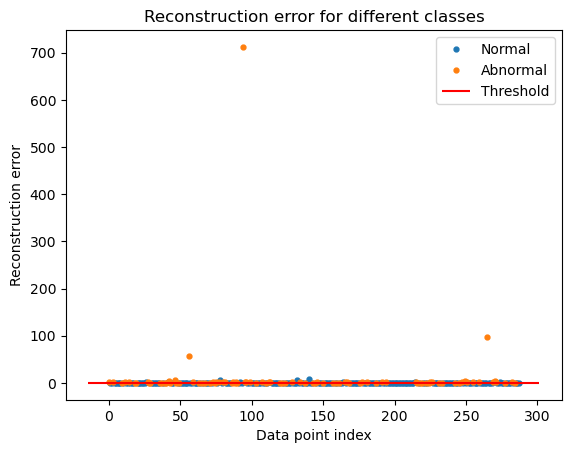

In [107]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

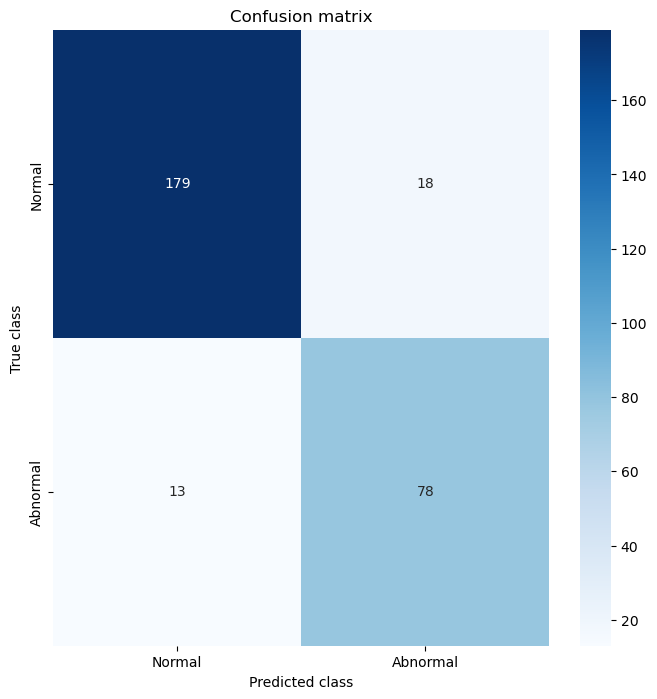

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       197
           1       0.81      0.86      0.83        91

    accuracy                           0.89       288
   macro avg       0.87      0.88      0.88       288
weighted avg       0.89      0.89      0.89       288



In [137]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))